<a href="https://colab.research.google.com/github/thais-hanashiro/novos-piratas/blob/master/Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Importando base de dados

In [6]:
# importando base de dados do drive local
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#importando com o pandas
df = pd.read_csv('train.csv')

In [17]:
#verificando tipo e quantidade de variáveis das colunas -> base completa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Date como objeto datetime** -> melhorar funcionalidade

In [0]:
df['Date']= pd.to_datetime(df['Date'])

**Conhecendo melhor df** -> uncomment se desejar

In [27]:
df.head()
#df.tail()
#df.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Desempenho médio semanal

## Todas as lojas

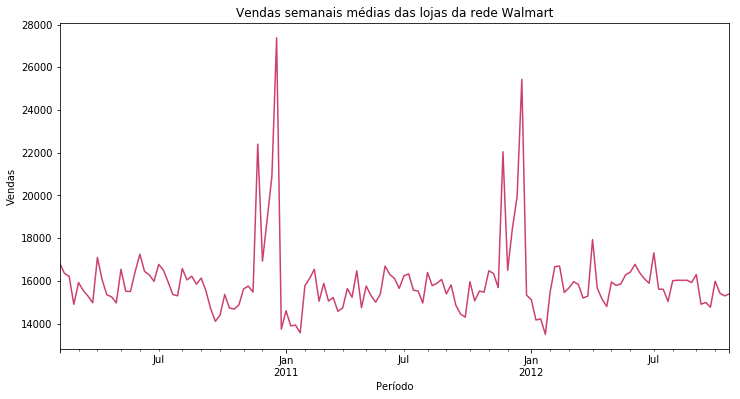

In [71]:
# ajustando tamanho da imagem
_1 = plt.figure(figsize=(12, 6))
# agrupando dados das lojas por data e tomando sua média
_1 = df.groupby('Date')['Weekly_Sales'].mean().plot(color='xkcd:dark pink')
# configurações de estilo
_1.set_title('Vendas semanais médias das lojas da rede Walmart')
_1.set_ylabel('Vendas')
_1.set_xlabel('Período')
plt.show()

O lineplot é o plot mais interessante para visualizar evolução temporal quando há uma grande quantidade de dados, pois facilmente visualiza-se a tendência global.

## 10 melhores lojas

Visualizando as melhores e piores lojas

Text(0, 0.5, 'Vendas')

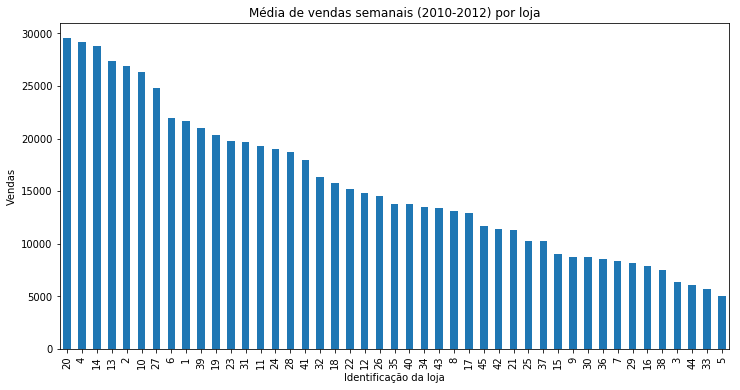

In [107]:
_2 = plt.figure(figsize=(12, 6))
_2 = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).plot.bar()
_2.set_title("Média de vendas semanais (2010-2012) por loja")
_2.set_xlabel('Identificação da loja')
_2.set_ylabel('Vendas')

Armazenando as 10 melhores lojas

In [0]:
melhores_10 = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).index[0:10]

Text(0, 0.5, 'Vendas')

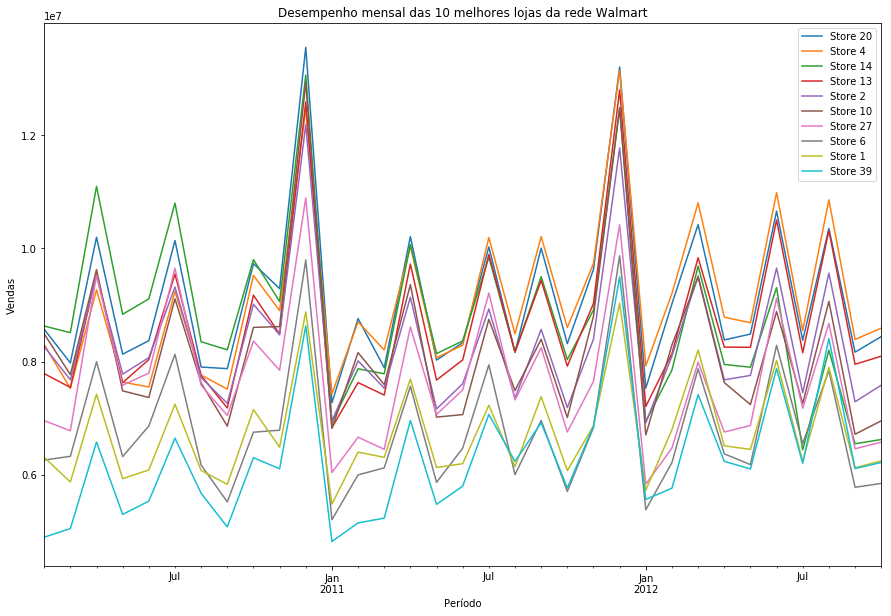

In [190]:
fig = plt.figure(num=None, figsize=(15, 10))
ax = plt.axes()
legend = []
for i in range(10):
  df.loc[df['Store'] == melhores_10[i]][['Date','Weekly_Sales']].resample('M',on='Date').sum().plot(ax=ax)
  legend.append('Store {}'.format(melhores_10[i]))
ax.legend(legend)
ax.set_title('Desempenho mensal das 10 melhores lojas da rede Walmart')
ax.set_xlabel('Período')
ax.set_ylabel('Vendas')


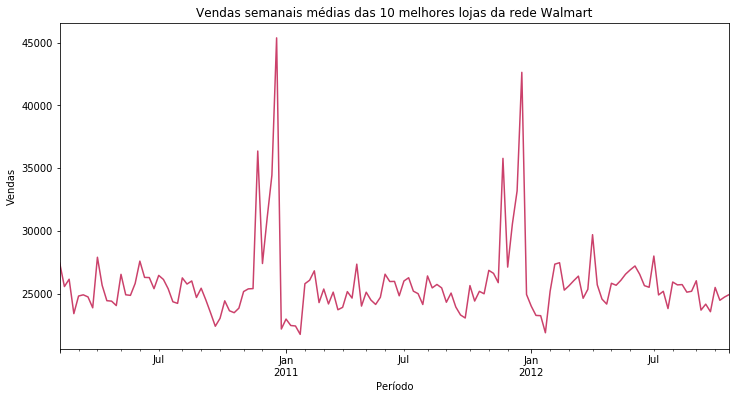

In [195]:
# ajustando tamanho da imagem
_4 = plt.figure(figsize=(12, 6))
# agrupando dados das lojas por data e tomando sua média
_4 = df.loc[df['Store'].isin(melhores_10)].groupby('Date')['Weekly_Sales'].mean().plot(color='xkcd:dark pink')
# configurações de estilo
_4.set_title('Vendas semanais médias das 10 melhores lojas da rede Walmart')
_4.set_ylabel('Vendas')
_4.set_xlabel('Período')
plt.show()

## 10 piores lojas

In [0]:
piores_10 = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=True).index[0:10]

In [194]:
piores_10

Int64Index([5, 33, 44, 3, 38, 16, 29, 7, 36, 30], dtype='int64', name='Store')

Text(0, 0.5, 'Vendas')

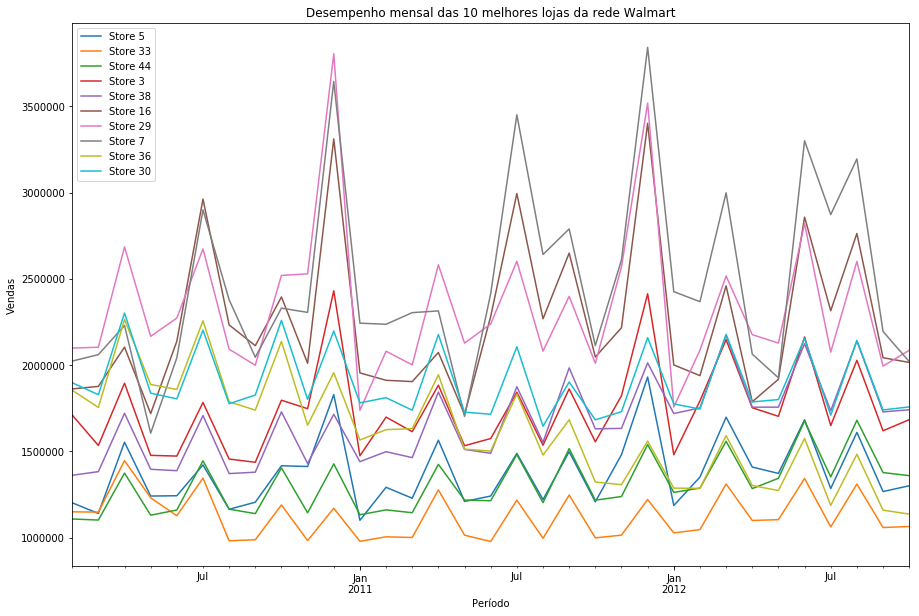

In [196]:
fig = plt.figure(num=None, figsize=(15, 10))
ax = plt.axes()
legend = []
for i in range(10):
  df.loc[df['Store'] == piores_10[i]][['Date','Weekly_Sales']].resample('M',on='Date').sum().plot(ax=ax)
  legend.append('Store {}'.format(piores_10[i]))
ax.legend(legend)
ax.set_title('Desempenho mensal das 10 piores lojas da rede Walmart')
ax.set_xlabel('Período')
ax.set_ylabel('Vendas')


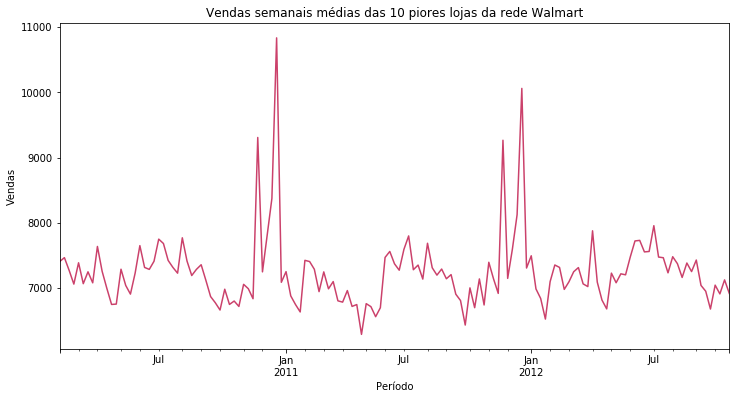

In [197]:
# ajustando tamanho da imagem
_5 = plt.figure(figsize=(12, 6))
# agrupando dados das lojas por data e tomando sua média
_5 = df.loc[df['Store'].isin(piores_10)].groupby('Date')['Weekly_Sales'].mean().plot(color='xkcd:dark pink')
# configurações de estilo
_5.set_title('Vendas semanais médias das 10 piores lojas da rede Walmart')
_5.set_ylabel('Vendas')
_5.set_xlabel('Período')
plt.show()

# Influência de feriados no desempenho

## **Média**

[Text(0, 0.5, 'Média das vendas semanais'),
 Text(0.5, 0, 'Loja'),
 Text(0.5, 1.0, 'Influência dos feriados no desempenho das lojas da rede Walmart')]

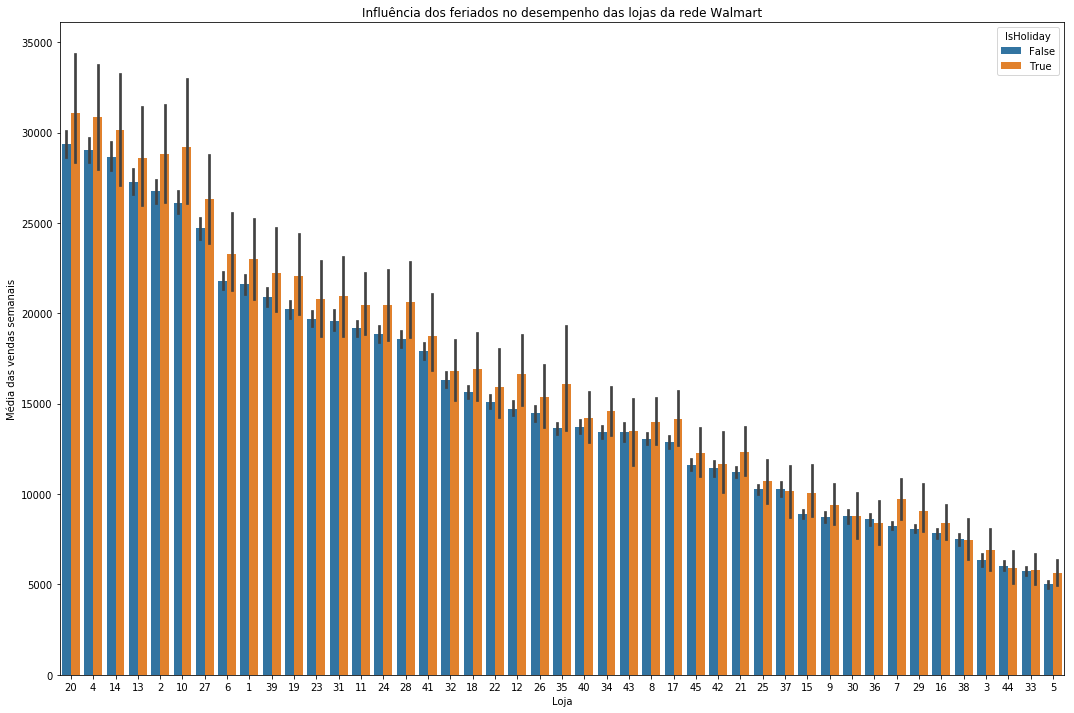

In [242]:
ordem = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).index[:]
fig = plt.figure(num=None, figsize=(18, 12))
ax = plt.axes()
sns.barplot(x="Store", y="Weekly_Sales", hue="IsHoliday", data=df, ax=ax, order=ordem, estimator = np.mean)
ax.set(xlabel='Loja', ylabel='Média das vendas semanais', title='Influência dos feriados no desempenho das lojas da rede Walmart')

## **Mediana**

[Text(0, 0.5, 'Mediana das vendas semanais'),
 Text(0.5, 0, 'Loja'),
 Text(0.5, 1.0, 'Influência dos feriados no desempenho das lojas da rede Walmart')]

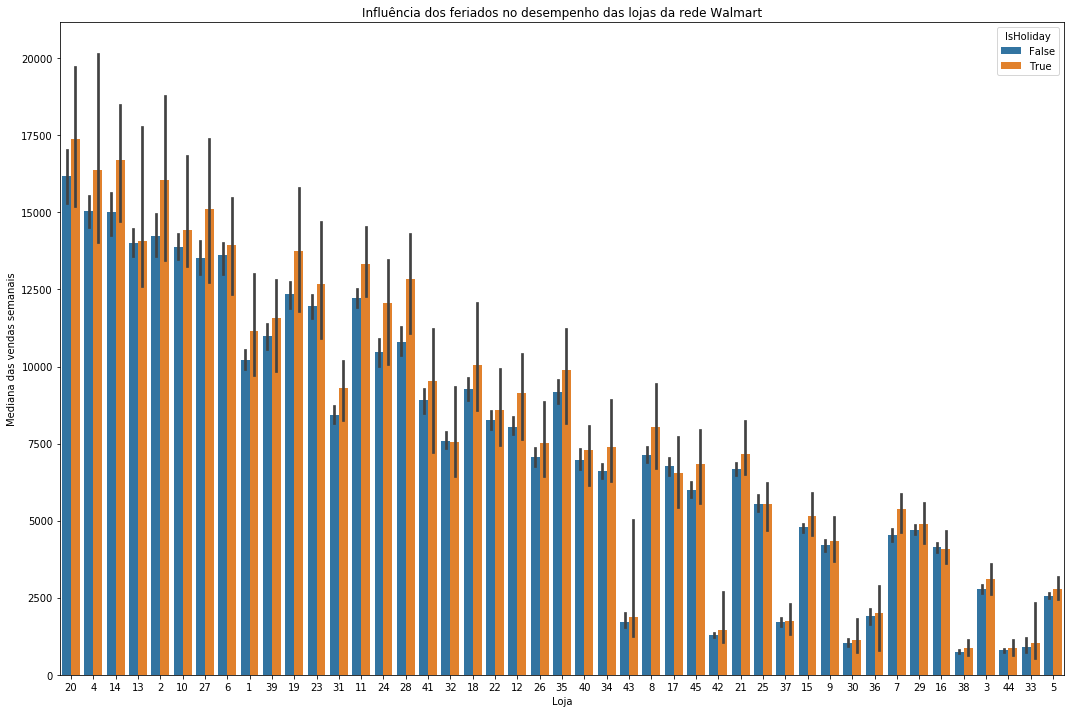

In [238]:
fig = plt.figure(num=None, figsize=(18, 12))
ax = plt.axes()
sns.barplot(x="Store", y="Weekly_Sales", hue="IsHoliday", data=df, ax=ax, order=ordem, estimator = np.median)
ax.set(xlabel='Loja', ylabel='Mediana das vendas semanais', title='Influência dos feriados no desempenho das lojas da rede Walmart')

## Conclusão
Feriados impactam positivamente nas vendas das lojas.

# Comparação com parâmetros externos

Como pode ser observado nos gráficos plotados anteriormente, as vendas mantem-se em geral aproximadamente constantes durante o ano. Como o Walmart é um varejista o qual vende muitos produtos de necessidade básica, tal constância faz sentido.

No entanto nota-se a presença de dois picos anuais no final dos meses de novembro e dezembro. Uma explicação possível é a presença de dois eventos importantes na cultura norte-americana: a black friday (sexta-feira após o tradicional Dia de Ação de Graças) e o natal, os quais movimentam o mercado doméstico.

In [0]:
#df.loc[df['Date'].dt.month.isin([10,11,12])]